In [1]:
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.optimizers import RMSprop
from plot_util import plot_history

Using TensorFlow backend.


In [0]:
TRAIN_DIR = './data/dogs-vs-cats-small/train'
VAL_DIR = './data/dogs-vs-cats-small/validation'

In [3]:
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

print("Number of trainable weights before forzen: {}".format(len(model.trainable_weights)))
conv_base.trainable = False
print("Number of trainable weights after forzen: {}".format(len(model.trainable_weights)))

model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=2e-5), metrics=['acc'])

Number of trainable weights before forzen: 30
Number of trainable weights after forzen: 4


In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [6]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_iter = train_gen.flow_from_directory(
    TRAIN_DIR, target_size=(150, 150), batch_size=20, class_mode='binary')

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_iter = val_gen.flow_from_directory(
    VAL_DIR, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
history = model.fit_generator(
    train_iter, steps_per_epoch=100, epochs=30, 
    validation_data=val_iter, validation_steps=50,
    verbose=2
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
 - 21s - loss: 2.0244 - acc: 0.7530 - val_loss: 0.8277 - val_acc: 0.8950
Epoch 2/30
 - 17s - loss: 0.9218 - acc: 0.8750 - val_loss: 0.5552 - val_acc: 0.9380
Epoch 3/30
 - 17s - loss: 0.7294 - acc: 0.8965 - val_loss: 0.4166 - val_acc: 0.9490
Epoch 4/30
 - 17s - loss: 0.6731 - acc: 0.9095 - val_loss: 0.4817 - val_acc: 0.9500
Epoch 5/30
 - 17s - loss: 0.5476 - acc: 0.9250 - val_loss: 0.4320 - val_acc: 0.9500
Epoch 6/30
 - 17s - loss: 0.5448 - acc: 0.9280 - val_loss: 0.3963 - val_acc: 0.9550
Epoch 7/30
 - 17s - loss: 0.4773 - acc: 0.9310 - val_loss: 0.3711 - val_acc: 0.9560
Epoch 8/30
 - 18s - loss: 0.4277 - acc: 0.9375 - val_loss: 0.3661 - val_acc: 0.9590
Epoch 9/30
 - 17s - loss: 0.4251 - acc: 0.9405 - val_loss: 0.3072 - val_acc: 0.9650
Epoch 10/30
 - 18s - loss: 0.4217 - acc: 0.9410 - val_loss: 0.3448 - val_acc: 0.9580
Epoch 11/30
 - 16s - loss: 0.3667 - acc: 0.9410 - val_loss: 0.4302 - val_acc: 0.9510
Epoch 12/30
 - 16s - loss:

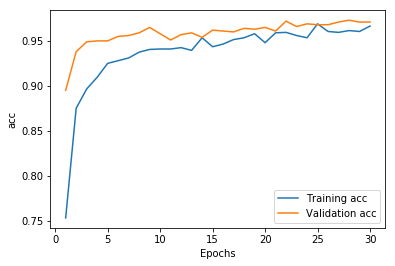

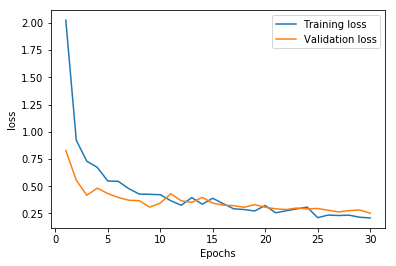

In [8]:
plot_history(history, metrics=('acc', 'loss'))